In [0]:
import numpy as np
from matplotlib import pyplot as plt

In [0]:
def train(l0, syn0, niter):
    err = np.zeros(niter)
    for i in range(niter):
        # forward propagation
        l0 = X
        l1 = nonlin(np.dot(l0,syn0))

        # how much did we miss?
        l1_error = y - l1
        err[i] = np.linalg.norm(l1_error)

        # multiply how much we missed by the 
        # slope of the sigmoid at the values in l1
        l1_delta = l1_error * nonlin(l1,True)

        # update weights
        syn0 += np.dot(l0.T,l1_delta)

    return l1, err

Output After Training:
[[0.02210697]
 [0.01793972]
 [0.98540523]
 [0.98200075]]


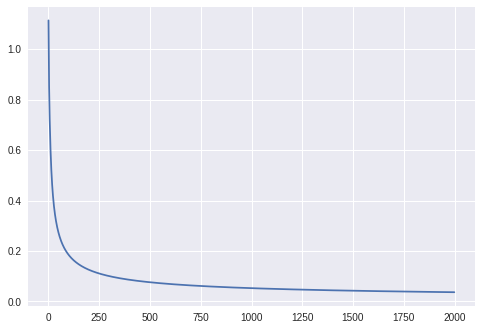

In [11]:
# sigmoid function
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))
    
# input dataset
X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])
    
# output dataset            
y = np.array([[0,0,1,1]]).T

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)

# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3,1)) - 1

l1, err = train(X, syn0, 2000)
plt.plot(err)

print("Output After Training:")
print(l1)

In [0]:
import numpy as np

def nonlin(x,deriv=False):
	if(deriv==True):
	    return x*(1-x)

	return 1/(1+np.exp(-x))
    
def adder(X, y, seed=1):
    np.random.seed(seed)

    # randomly initialize our weights with mean 0
    syn0 = 2*np.random.random((3,4)) - 1
    syn1 = 2*np.random.random((4,3)) - 1

    niter = 10000
    err = np.zeros(niter)
    for j in range(niter):

      # Feed forward through layers 0, 1, and 2
        l0 = X
        l1 = nonlin(np.dot(l0,syn0))
        l2 = nonlin(np.dot(l1,syn1))

        # how much did we miss the target value?
        l2_error = y - l2

        err[j] = np.linalg.norm(l2_error)

        # in what direction is the target value?
        # were we really sure? if so, don't change too much.
        l2_delta = l2_error*nonlin(l2,deriv=True)

        # how much did each l1 value contribute to the l2 error (according to the weights)?
        l1_error = l2_delta.dot(syn1.T)

        # in what direction is the target l1?
        # were we really sure? if so, don't change too much.
        l1_delta = l1_error * nonlin(l1,deriv=True)

        syn1 += l1.T.dot(l2_delta)
        syn0 += l0.T.dot(l1_delta)

    print('Seed:', seed)
    print(np.round(l2, 2))
    plt.plot(err, label='Seed = %d' % seed)
    plt.legend();

Seed: 0
[[0.   0.04 0.99]
 [0.01 0.98 0.  ]
 [0.03 0.97 1.  ]
 [0.99 0.02 0.01]
 [1.   0.   0.99]
 [0.99 0.99 0.  ]
 [0.98 1.   0.99]]
Seed: 1
[[0.   0.03 0.99]
 [0.   1.   0.  ]
 [0.03 0.97 0.99]
 [0.98 0.02 0.01]
 [0.99 0.02 1.  ]
 [0.99 0.99 0.  ]
 [0.98 0.99 0.99]]
Seed: 2
[[0.   0.03 0.99]
 [0.   0.98 0.  ]
 [0.02 0.98 1.  ]
 [1.   0.02 0.02]
 [1.   0.   0.99]
 [0.99 0.99 0.  ]
 [0.98 0.99 0.99]]
Seed: 3
[[0.   0.03 0.99]
 [0.01 0.98 0.  ]
 [0.02 0.98 1.  ]
 [0.99 0.02 0.02]
 [1.   0.   0.99]
 [0.99 0.99 0.  ]
 [0.98 0.99 0.99]]
Seed: 4
[[0.   0.03 0.99]
 [0.   0.98 0.01]
 [0.02 0.97 1.  ]
 [0.99 0.02 0.01]
 [1.   0.   0.99]
 [0.99 0.99 0.01]
 [0.98 0.99 1.  ]]


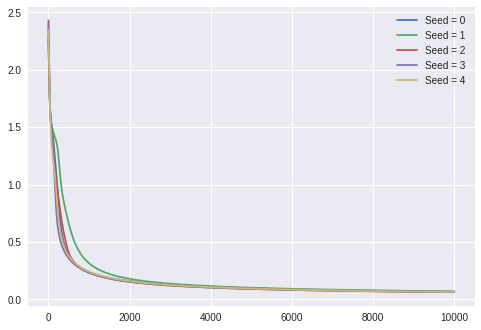

In [43]:
X = np.array([[0,0,0],
              [0,0,1],
              [0,1,0],
              [0,1,1],
              [1,0,0],
              [1,0,1],
              [1,1,0]])
                
y = np.array([[0,0,1],
              [0,1,0],
              [0,1,1],
              [1,0,0],
              [1,0,1],
              [1,1,0],
              [1,1,1]])

for seed in range(5):
    adder(X, y, seed=seed)

Seed: 0
[[0.08 0.1  0.97]
 [0.   1.   0.  ]
 [0.09 1.   1.  ]
 [1.   0.11 0.  ]
 [1.   0.   1.  ]
 [0.9  0.85 0.  ]
 [0.89 0.92 1.  ]
 [0.6  0.48 0.23]]
Seed: 1
[[0.03 0.06 1.  ]
 [0.01 0.97 0.  ]
 [0.   0.96 1.  ]
 [0.95 0.   0.  ]
 [1.   0.01 0.99]
 [0.95 0.95 0.02]
 [0.97 0.97 0.98]
 [0.06 0.04 0.  ]]
Seed: 2
[[0.02 0.02 0.99]
 [0.33 0.33 0.  ]
 [0.   0.98 1.  ]
 [0.33 0.33 0.  ]
 [0.98 0.01 0.99]
 [1.   0.98 0.01]
 [0.99 1.   0.99]
 [0.33 0.33 0.  ]]
Seed: 3
[[0.   0.04 1.  ]
 [0.08 0.92 0.01]
 [0.09 0.93 1.  ]
 [0.88 0.08 0.01]
 [0.89 0.06 0.98]
 [1.   0.99 0.  ]
 [0.99 0.99 1.  ]
 [0.1  0.   0.02]]
Seed: 4
[[0.04 0.12 0.99]
 [0.   0.97 0.  ]
 [0.   0.93 1.  ]
 [0.9  0.   0.01]
 [1.   0.   0.99]
 [0.94 0.94 0.01]
 [1.   1.   1.  ]
 [0.07 0.1  0.  ]]


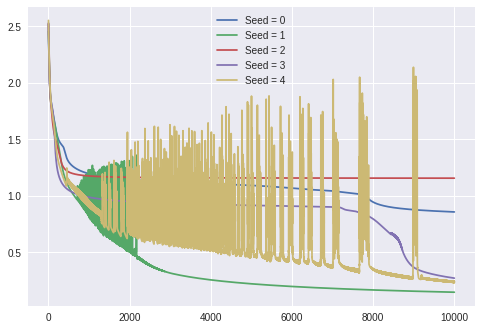

In [44]:
X = np.array([[0,0,0],
              [0,0,1],
              [0,1,0],
              [0,1,1],
              [1,0,0],
              [1,0,1],
              [1,1,0],
              [1,1,1]])
                
y = np.array([[0,0,1],
              [0,1,0],
              [0,1,1],
              [1,0,0],
              [1,0,1],
              [1,1,0],
              [1,1,1],
              [0,0,0]])

for seed in range(5):
    adder(X, y, seed=seed)

Seed: 0
[[0.98 0.99 0.98]
 [1.   0.99 0.  ]
 [1.   0.   1.  ]
 [1.   0.01 0.01]
 [0.01 0.99 1.  ]
 [0.01 0.99 0.01]
 [0.01 0.01 0.99]
 [0.   0.01 0.  ]]
Seed: 1
[[0.98 0.98 0.98]
 [1.   0.99 0.  ]
 [1.   0.   1.  ]
 [0.99 0.01 0.01]
 [0.01 1.   1.  ]
 [0.01 0.99 0.01]
 [0.01 0.   0.99]
 [0.   0.01 0.01]]
Seed: 2
[[0.98 0.98 0.99]
 [0.99 1.   0.  ]
 [0.99 0.   0.99]
 [0.99 0.01 0.01]
 [0.   0.99 0.99]
 [0.01 0.99 0.01]
 [0.01 0.01 1.  ]
 [0.01 0.01 0.01]]
Seed: 3
[[0.98 0.99 0.98]
 [1.   0.99 0.  ]
 [0.99 0.   1.  ]
 [0.99 0.01 0.  ]
 [0.   0.99 0.99]
 [0.01 1.   0.01]
 [0.02 0.01 0.99]
 [0.   0.01 0.01]]
Seed: 4
[[0.98 0.98 0.98]
 [1.   1.   0.  ]
 [1.   0.01 0.99]
 [1.   0.01 0.01]
 [0.   1.   1.  ]
 [0.01 1.   0.01]
 [0.01 0.01 0.99]
 [0.   0.   0.01]]


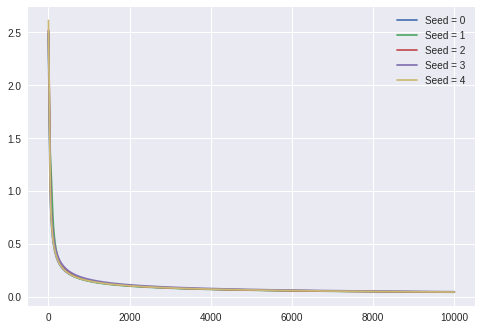

In [45]:
X = np.array([[0,0,0],
              [0,0,1],
              [0,1,0],
              [0,1,1],
              [1,0,0],
              [1,0,1],
              [1,1,0],
              [1,1,1]])
                
y = np.array([[1,1,1],
              [1,1,0],
              [1,0,1],
              [1,0,0],
              [0,1,1],
              [0,1,0],
              [0,0,1],
              [0,0,0]])

for seed in range(5):
    adder(X, y, seed=seed)